In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *

In [4]:
X_PATH="/home/li/data/secondpaper/expand_focus_images"
Y_PATH="/home/li/data/secondpaper/expand_original_images"
trainset=MFDataset(X_PATH,Y_PATH,transform=transforms.Compose([ToTensor1()]))

In [30]:
def show_img(x,y):
    for i in range(3):
        ax=plt.subplot(1,3,i+1,ymargin=-0.4)
        ax.axis('off')
        if i==0 or i==1:
            plt.imshow(x[i],cmap='gray')
        else:
            plt.imshow(y,cmap='gray')

torch.Size([256, 256])
torch.Size([256, 256])
torch.Size([256, 256])


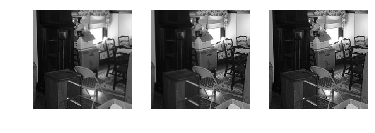

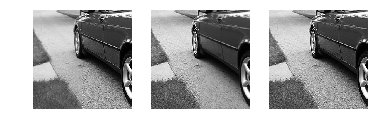

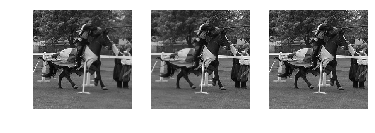

In [31]:
for i in range(len(trainset)):
    sample=trainset[i]
    print(sample['y'].shape)
    plt.figure(figsize=(6,6))
    show_img(**sample)
    if i == 2:
        plt.show()
        break

In [17]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=4)

In [83]:
def show_img_batched(sample_batched):
    x,y=sample_batched['x'],sample_batched['y']
    
#     plt.subplot(1,3,1)
#     plt.imshow(x.numpy()[0][0],cmap='gray')
#     plt.subplot(1,3,2)
#     plt.imshow(x.numpy()[0][1],cmap='gray')
#     plt.subplot(1,3,3)
#     plt.imshow(y.numpy()[0],cmap='gray')

    x=x.view(-1,256,256).unsqueeze(1)
    y=y.unsqueeze(1)

    grid=torchvision.utils.make_grid(torch.cat((x,y),0))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

0 torch.Size([4, 2, 256, 256]) torch.Size([4, 256, 256])
1 torch.Size([4, 2, 256, 256]) torch.Size([4, 256, 256])


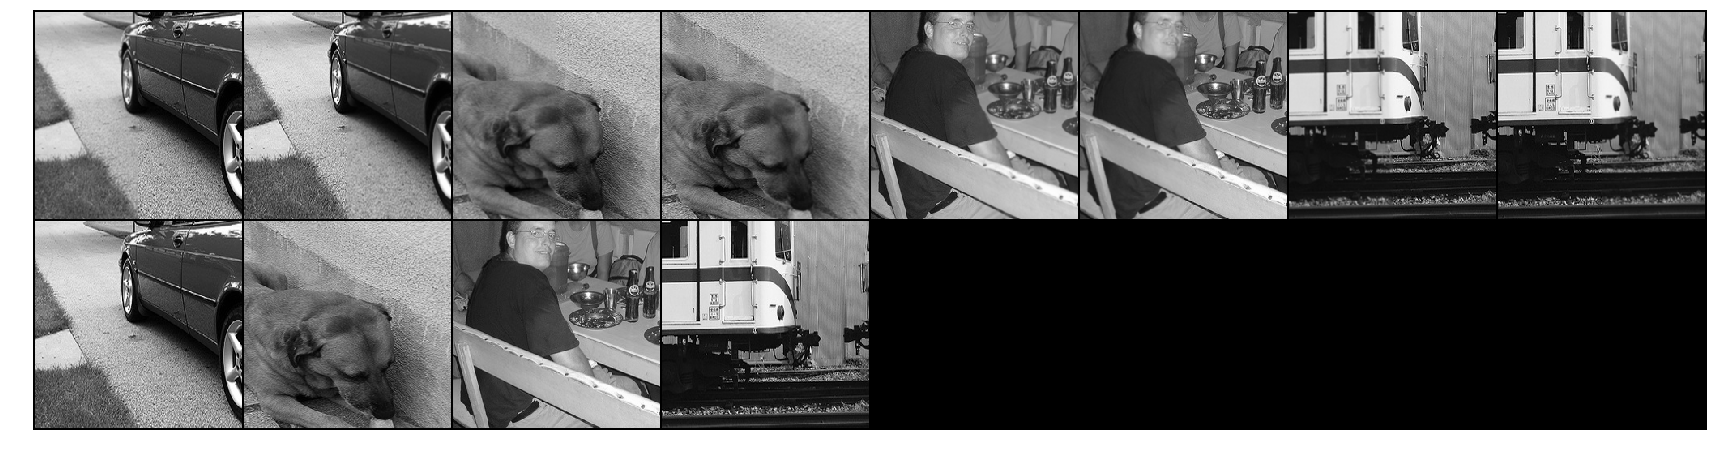

In [90]:
for i_batch,sample_batched in enumerate(trainloader):
    print(i_batch,sample_batched['x'].size(),sample_batched['y'].size())
    if i_batch==1:
        plt.figure(figsize=(30,30))
        plt.axis('off')
        show_img_batched(sample_batched)
        plt.show()
        break

In [91]:
for i in range(9,-1,-1):
    print(i)

9
8
7
6
5
4
3
2
1
0


ModuleNotFoundError: No module named '__main__.util'; '__main__' is not a package